# Customer Segmentation — Credit Card Dataset

## 1 · Setup & Data Loading

In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

import kagglehub
import os

sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.figsize": (8, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 11,
})

In [5]:
# path = kagglehub.dataset_download("arjunbhasin2013/ccdata")


# csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
# df = pd.read_csv(os.path.join(path, csv_file))
# df.head()

In [6]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Variable Descriptions

1.  **CUST_ID**: Identification of the Credit Card holder (Categorical).

2.  **BALANCE**: Balance amount left in the account to make purchases.

3.  **BALANCE_FREQUENCY**: How frequently the Balance is updated (score between 0 and 1, where 1 = frequently updated).

4.  **PURCHASES**: Total amount of purchases made from the account.
5.  **ONEOFF_PURCHASES**: Maximum purchase amount done in a single transaction (one-go).
6.  **INSTALLMENTS_PURCHASES**: Amount of purchases done in installments.
7.  **CASH_ADVANCE**: Cash in advance given by the user (withdrawing cash using the card).
8.  **PURCHASES_FREQUENCY**: How frequently purchases are being made (score between 0 and 1).
9.  **ONEOFF_PURCHASES_FREQUENCY**: How frequently purchases happen in "one-go" (score between 0 and 1).
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (score between 0 and 1).
11. **CASH_ADVANCE_FREQUENCY**: How frequently the "cash in advance" service is being used.
12. **CASH_ADVANCE_TRX**: Number of transactions made with "Cash in Advance".
13. **PURCHASES_TRX**: Number of purchase transactions made.
14. **CREDIT_LIMIT**: The credit limit assigned to the user.
15. **PAYMENTS**: Total amount of payments made by the user.
16. **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user.
17. **PRC_FULL_PAYMENT**: Percentage of the full payment paid by the user.
18. **TENURE**: Tenure of credit card service for the user (number of months).

## 2 · Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
missing = df.isnull().sum()
missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
(missing / len(df) * 100).round(2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
df.duplicated().sum()

np.int64(0)

### Initial Observations
- The dataset has **8,950 customers** described by **18 features** covering balance, purchases, cash advances, payments, credit limit, and tenure.
- `MINIMUM_PAYMENTS` has the most missing values, followed by `CREDIT_LIMIT`.
- `CUST_ID` is a non-numeric identifier and will be dropped before modelling.

In [24]:
frequency_columns = numeric_cols = df.select_dtypes(include=['number']).columns.contains('FREQUENCY')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[["BALANCE_FREQUENCY"]])
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features')
plt.show()

AttributeError: 'Index' object has no attribute 'contains'

In [23]:
df["BALANCE_FREQUENCY"].unique()

array([0.818182, 0.909091, 1.      , 0.636364, 0.545455, 0.875   ,
       0.454545, 0.727273, 0.5     , 0.888889, 0.090909, 0.272727,
       0.363636, 0.      , 0.666667, 0.75    , 0.857143, 0.181818,
       0.333333, 0.6     , 0.3     , 0.125   , 0.9     , 0.833333,
       0.8     , 0.2     , 0.777778, 0.555556, 0.25    , 0.142857,
       0.571429, 0.4     , 0.444444, 0.714286, 0.222222, 0.1     ,
       0.625   , 0.428571, 0.111111, 0.285714, 0.7     , 0.375   ,
       0.166667])

In [18]:
first_group

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY'],
      dtype='object')

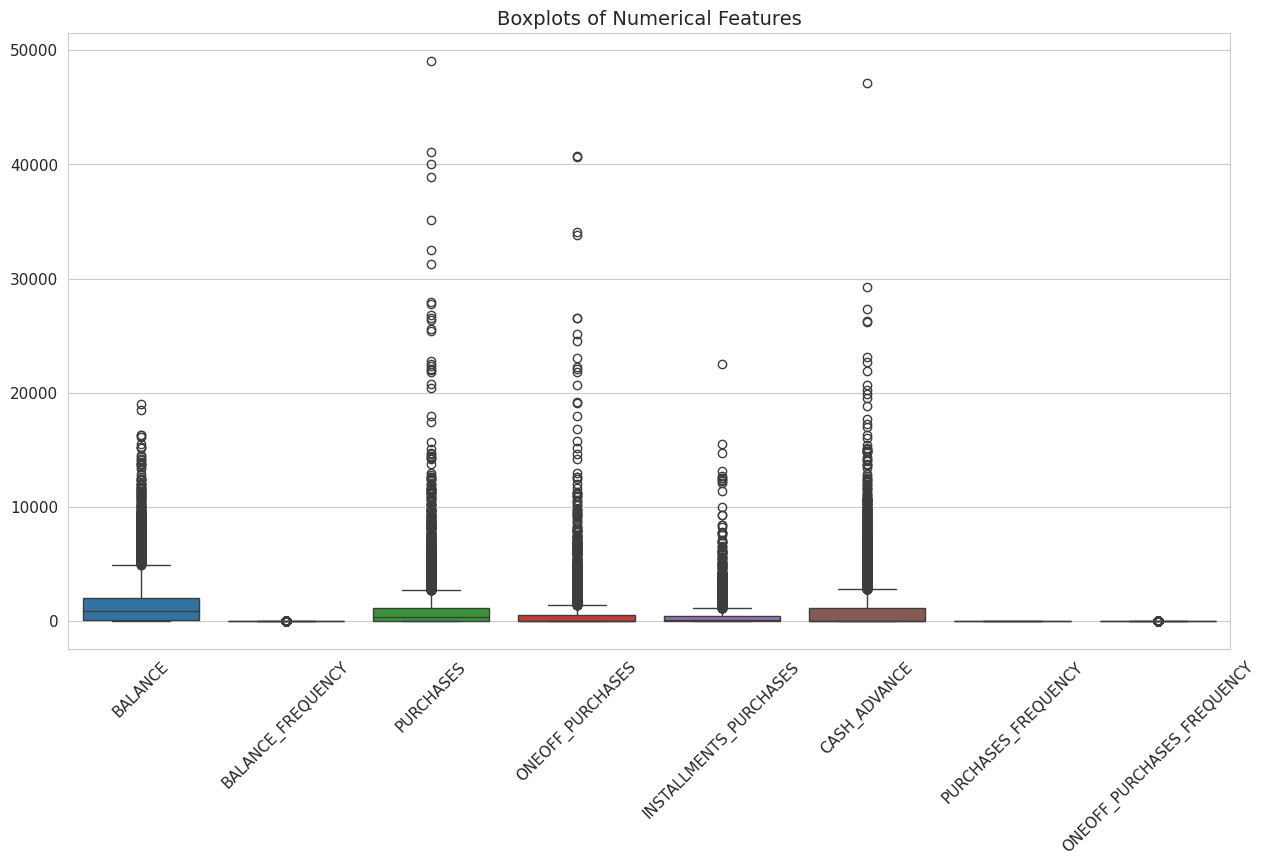

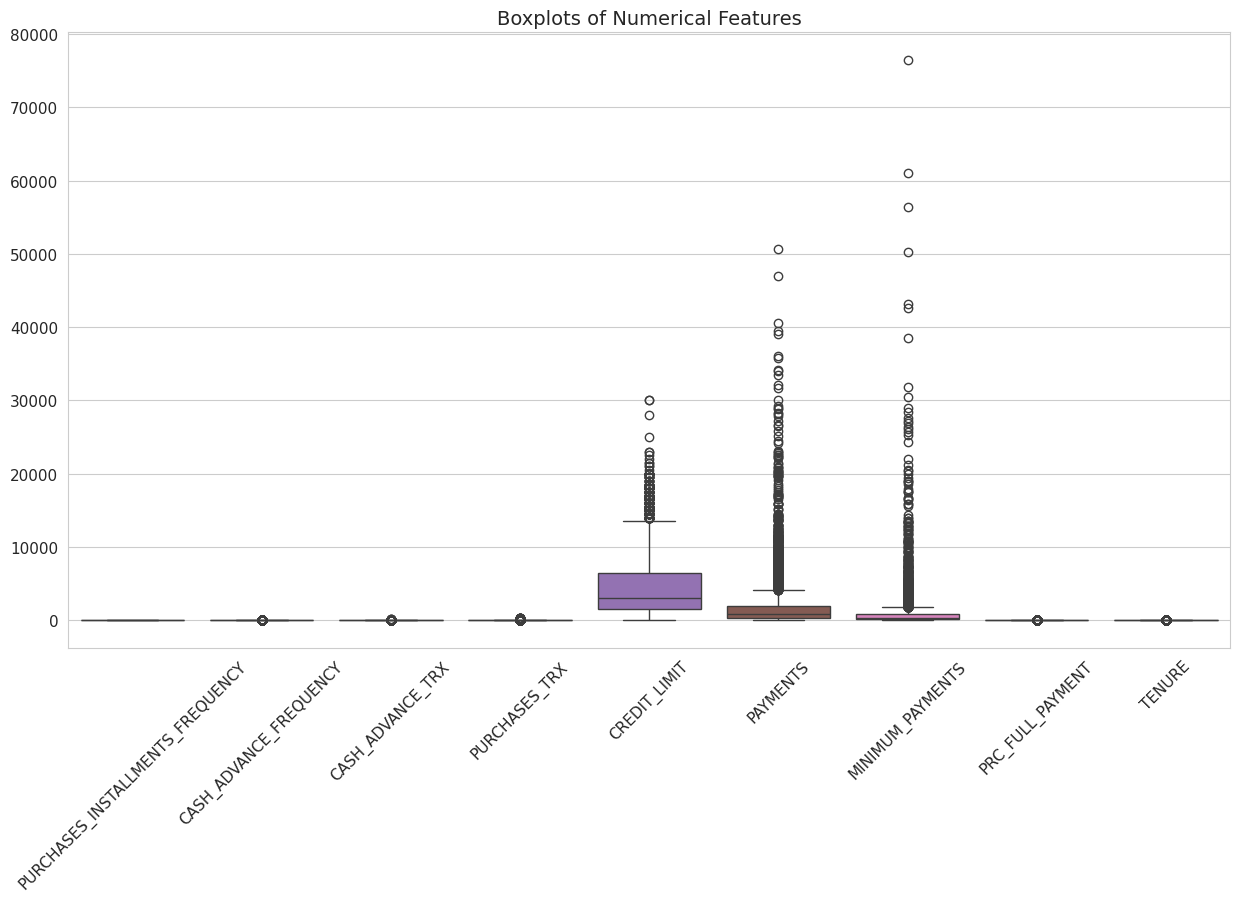

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
first_group = numeric_cols[:len(numeric_cols)//2]
second_group = numeric_cols[len(numeric_cols)//2:]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[first_group])
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features')
plt.show()



plt.figure(figsize=(15, 8))
sns.boxplot(data=df[second_group])
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features')
plt.show()

## 3 · Data Cleaning & Preprocessing

In [8]:
# Drop the customer ID
df.drop("CUST_ID", axis=1, inplace=True)

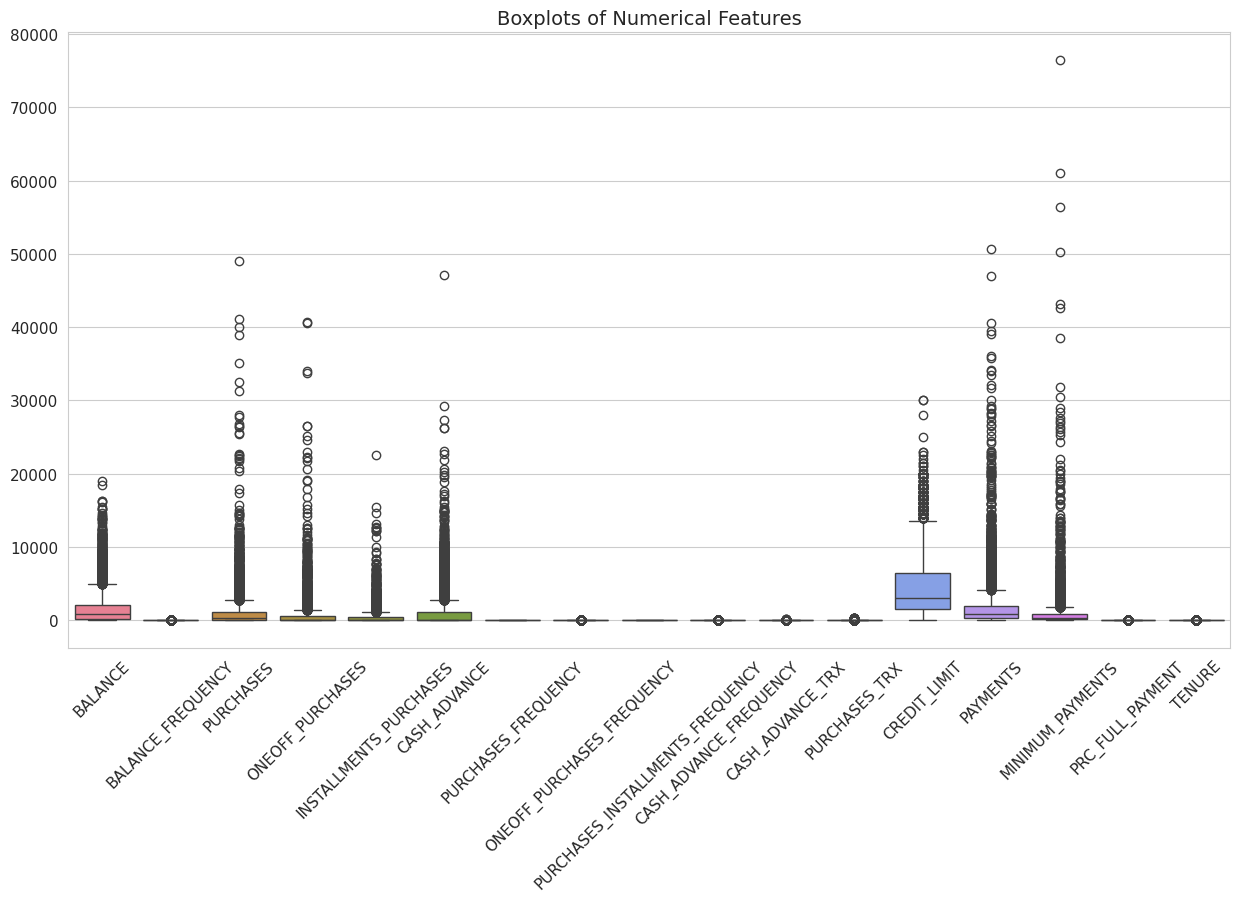

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot boxplots for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features')
plt.show()


In [10]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(), inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(), inplace=True)

df.isnull().sum().sum()

np.int64(0)

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## 4 · Distribution & Relationship Analysis

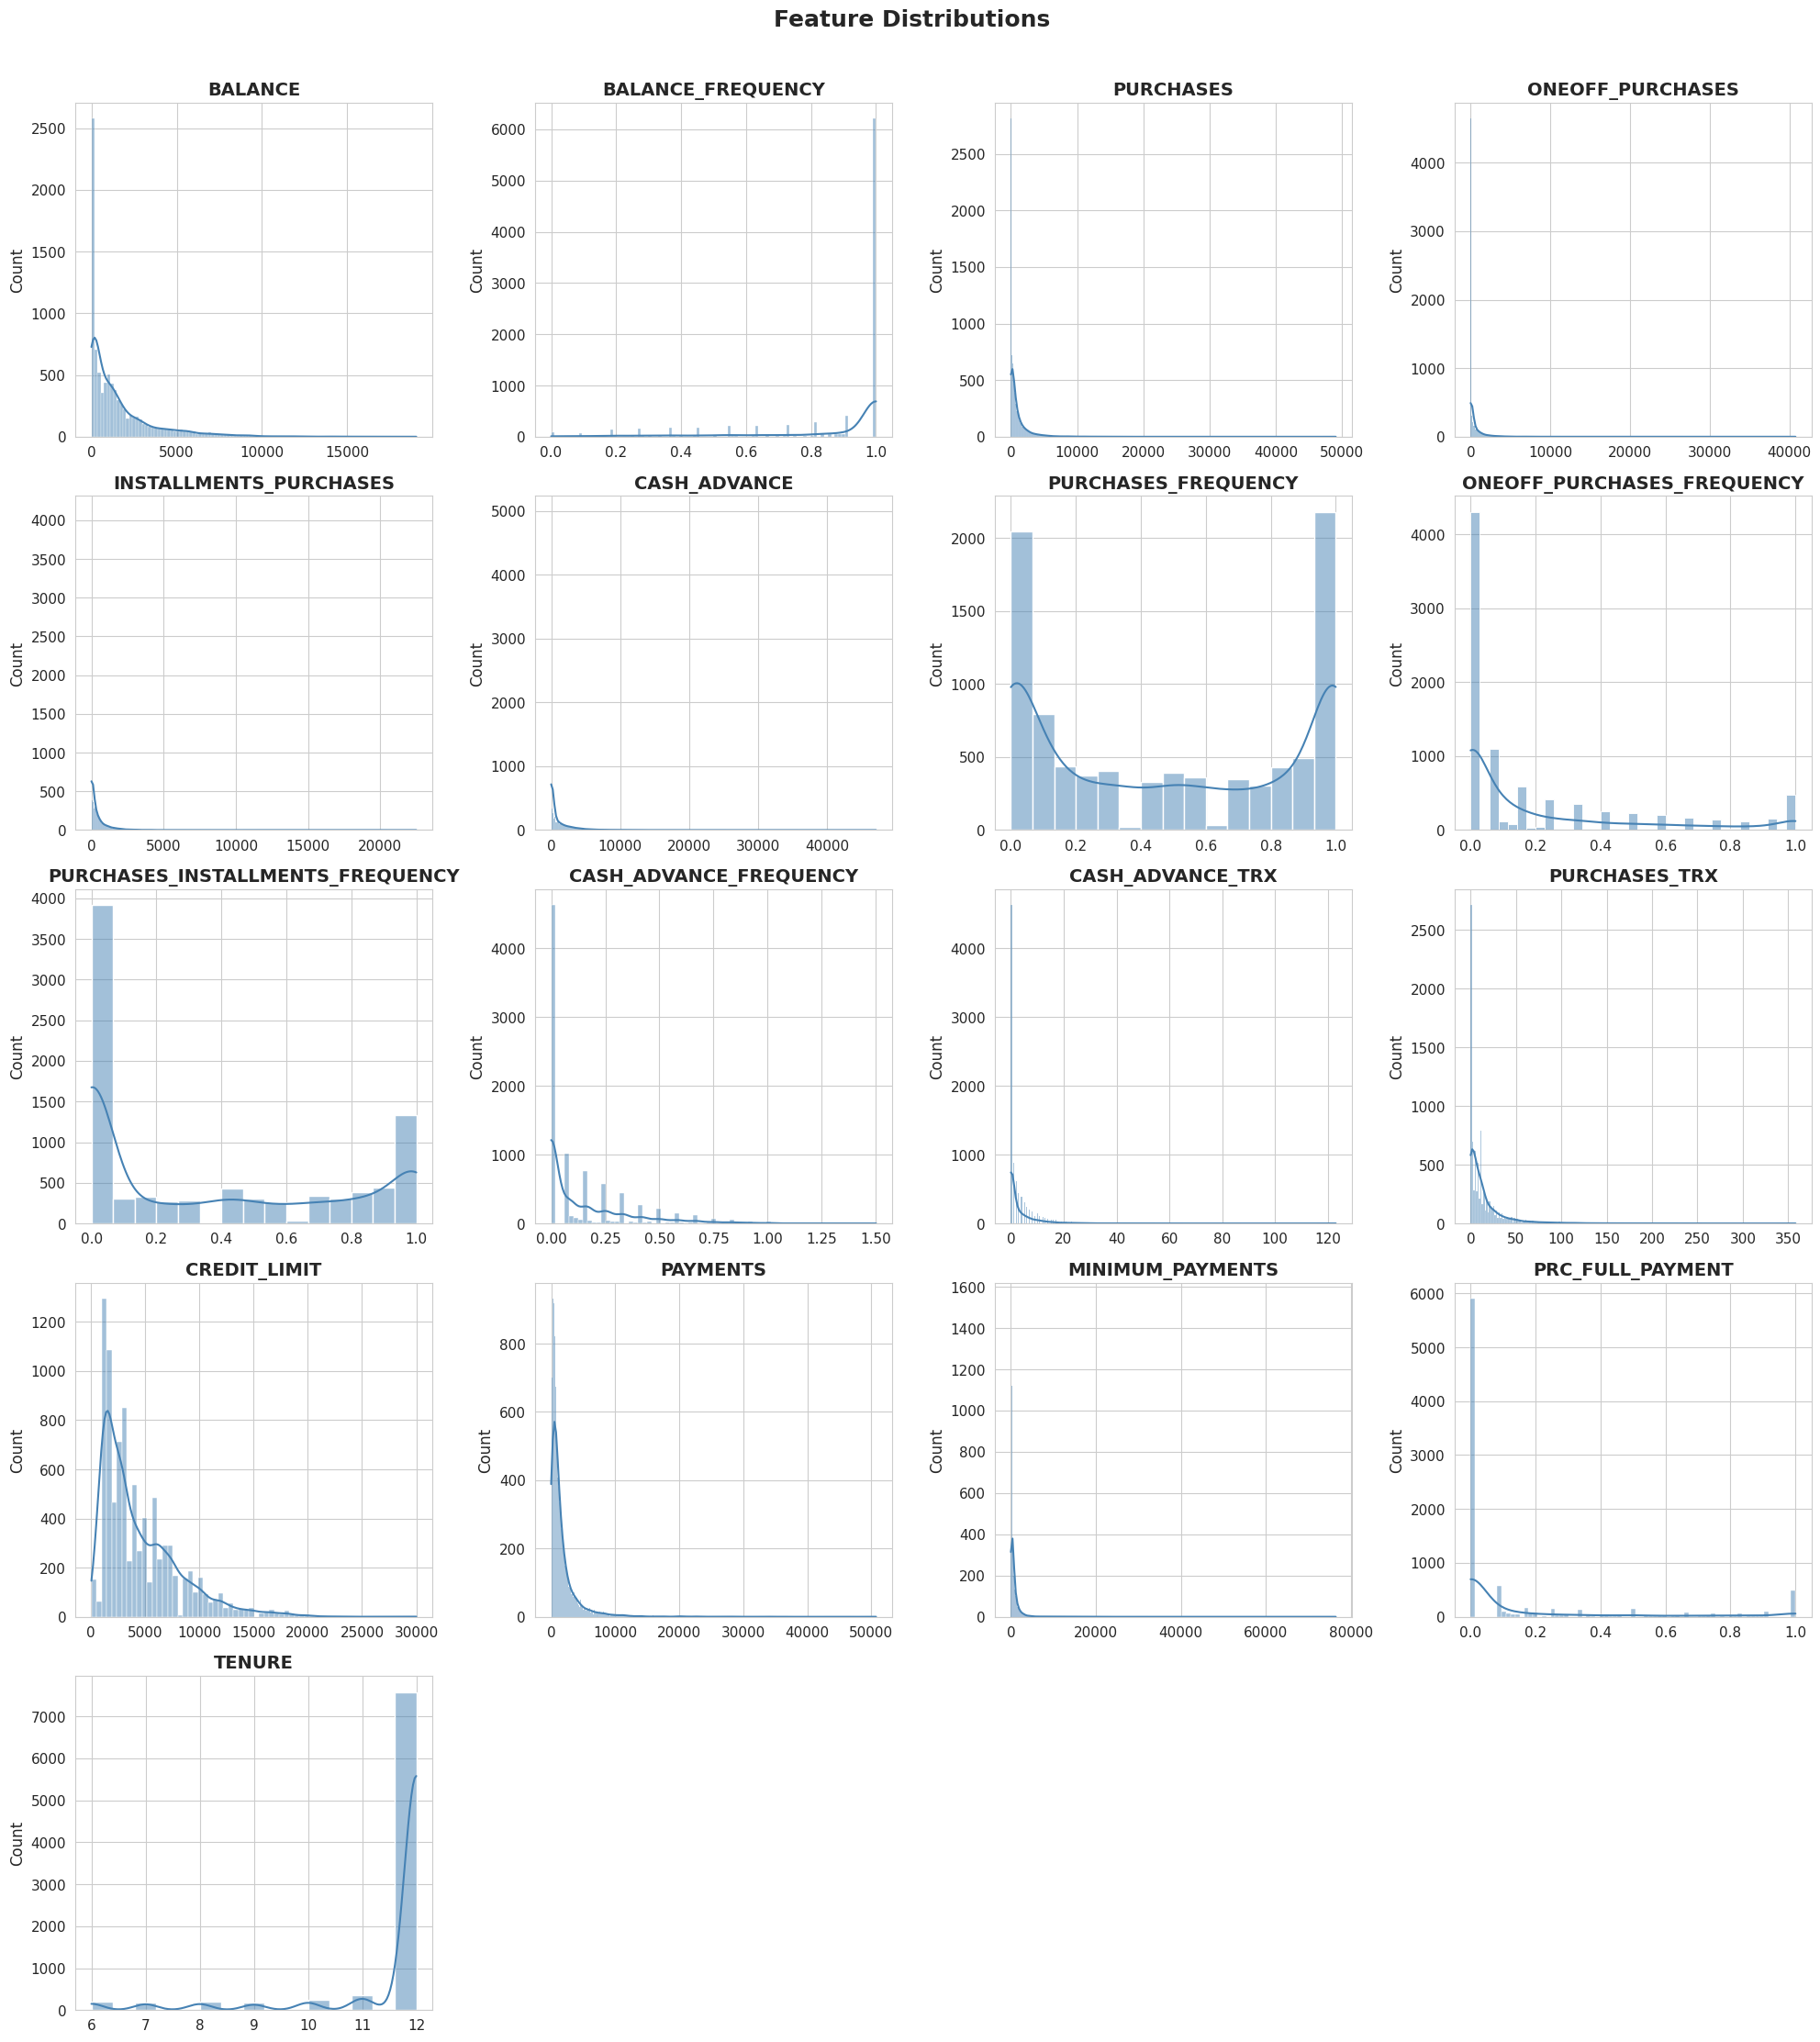

In [12]:
# Distribution of each feature
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[col], kde=True, color="steelblue", ax=ax, edgecolor="white")
    ax.set_title(col, fontweight="bold")
    ax.set_xlabel("")

# hide unused subplots
for j in range(len(df.columns), len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Feature Distributions", fontsize=18, fontweight="bold", y=1.01)
plt.tight_layout()
plt.show()

### Distribution Insights
- **BALANCE, PURCHASES, CASH_ADVANCE, PAYMENTS** are heavily right-skewed — a small number of customers dominate high-value transactions.
- **BALANCE_FREQUENCY** and **PURCHASES_FREQUENCY** are bimodal — customers either use a feature frequently or not at all.
- **TENURE** is strongly concentrated at 12 months, indicating most customers have been active for a full year.
- **PRC_FULL_PAYMENT** is heavily zero-inflated — very few customers pay their balance in full.